In [3]:
%matplotlib inline


# Data Browser


Connecting data between multiple canvases.

This example covers how to interact data with multiple canvases. This
let's you select and highlight a point on one axis, and generating the
data of that point on the other axis.


<IPython.core.display.Javascript object>


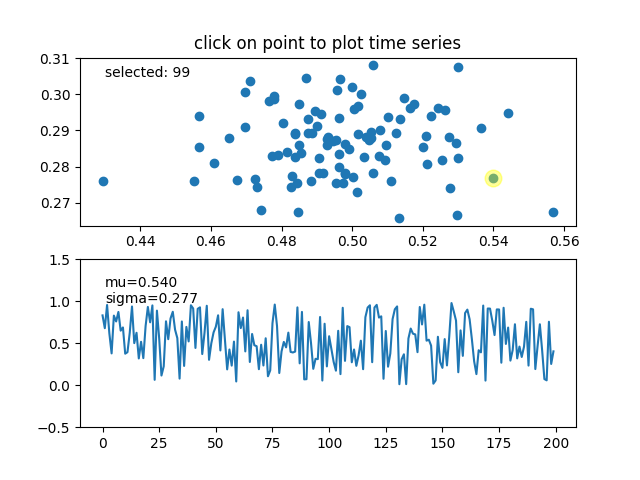

In [5]:
import numpy as np


class PointBrowser(object):
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """

    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    X = np.random.rand(100, 200)
    xs = np.mean(X, axis=1)
    ys = np.std(X, axis=1)

    fig, (ax, ax2) = plt.subplots(2, 1)
    ax.set_title('click on point to plot time series')
    line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

    browser = PointBrowser()

    fig.canvas.mpl_connect('pick_event', browser.onpick)
    fig.canvas.mpl_connect('key_press_event', browser.onpress)

    plt.show()